In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER, ConfigurationModel, RandomShuffle
from VirusHostNetworkAnalysis.properties import BipartiteGraph

In [4]:
import sys
myco = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv')
myco.make_rectangular_matrix()
sys.getsizeof(myco.virus_host_array)


60605

In [20]:
myco_properties = BipartiteGraph(myco)
myco_properties.plot_heatmap()

NameError: name 'myco' is not defined

<Figure size 1000x600 with 0 Axes>

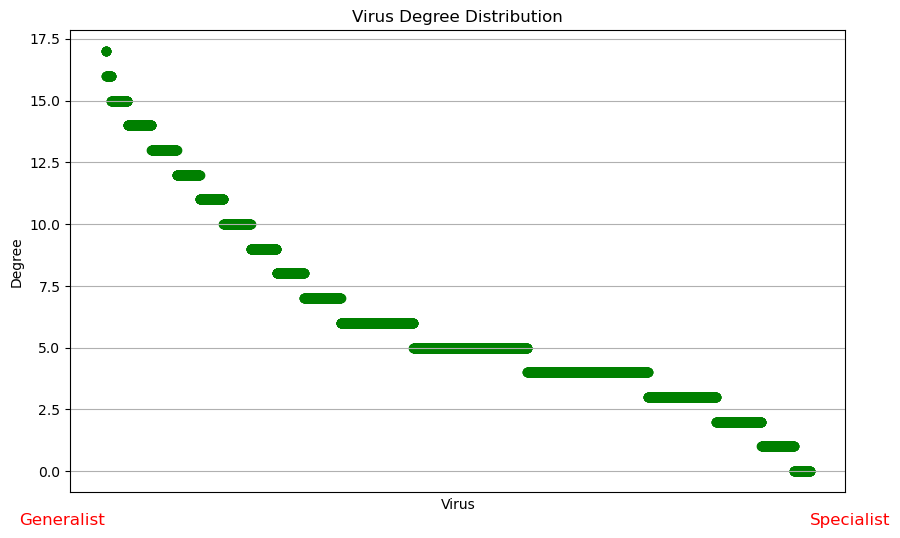

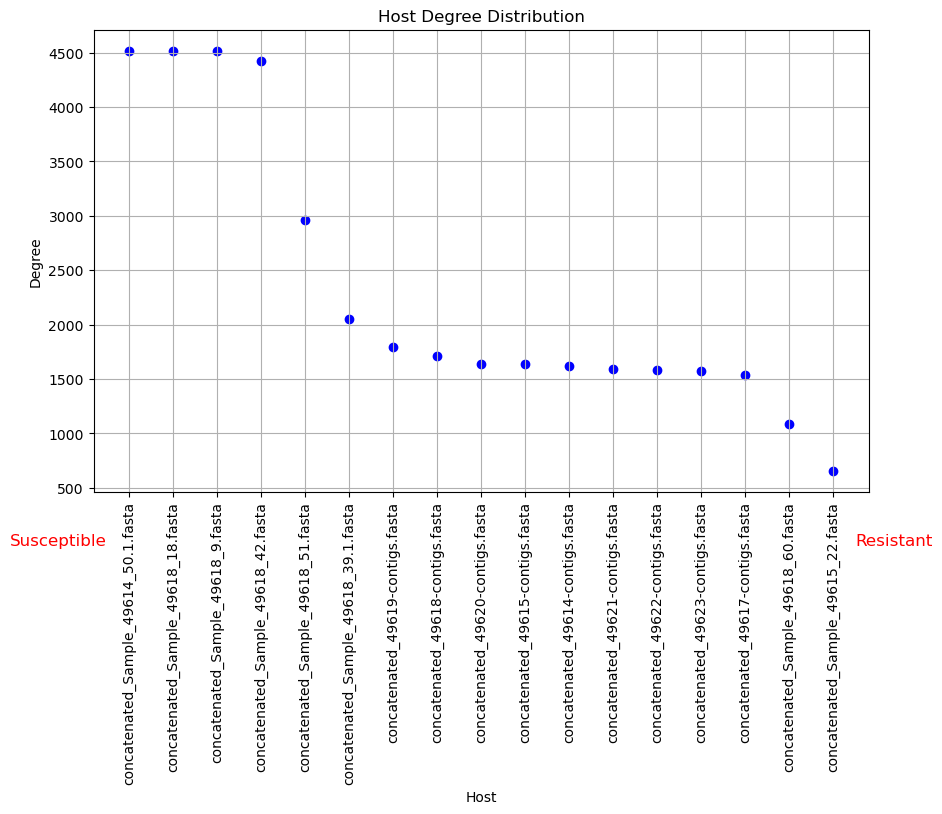

In [19]:
# aug4
aug4 = PredictionMatrix('Sample_Input/Aug4_predictions.tsv')
aug4.make_rectangular_matrix()
aug4_properties = BipartiteGraph(aug4)
aug4_properties.plot_degree_by_species()

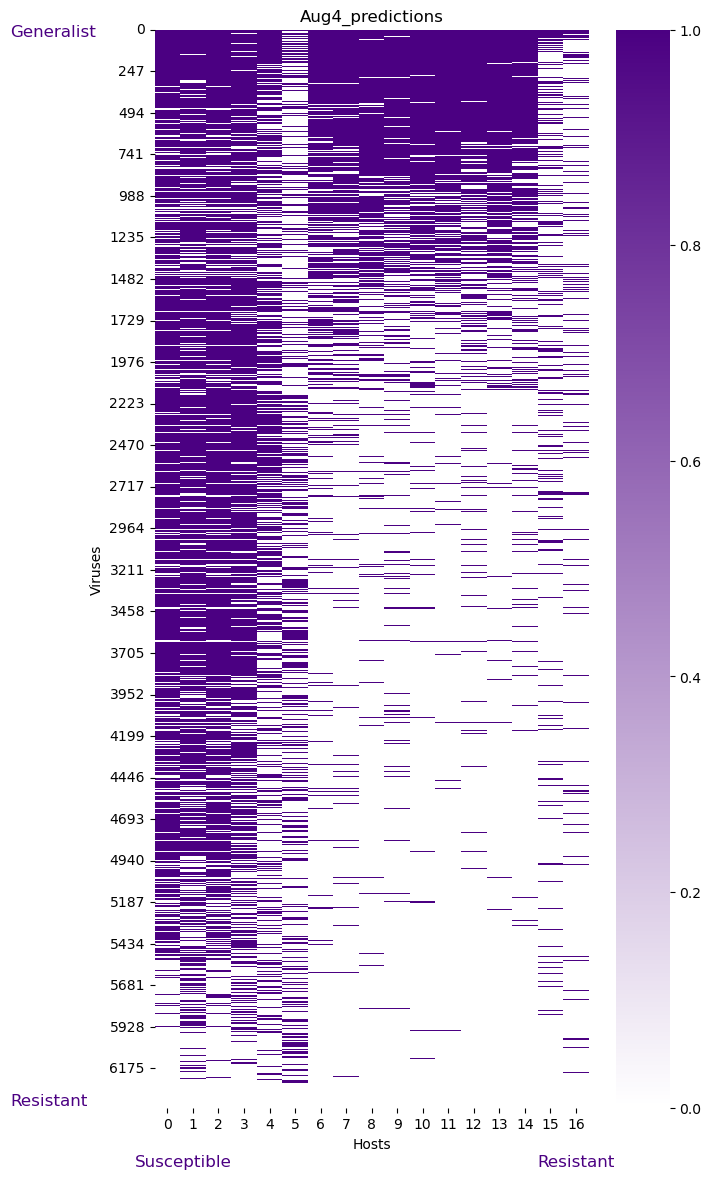

In [47]:
aug4_properties.plot_heatmap()

<Figure size 1000x600 with 0 Axes>

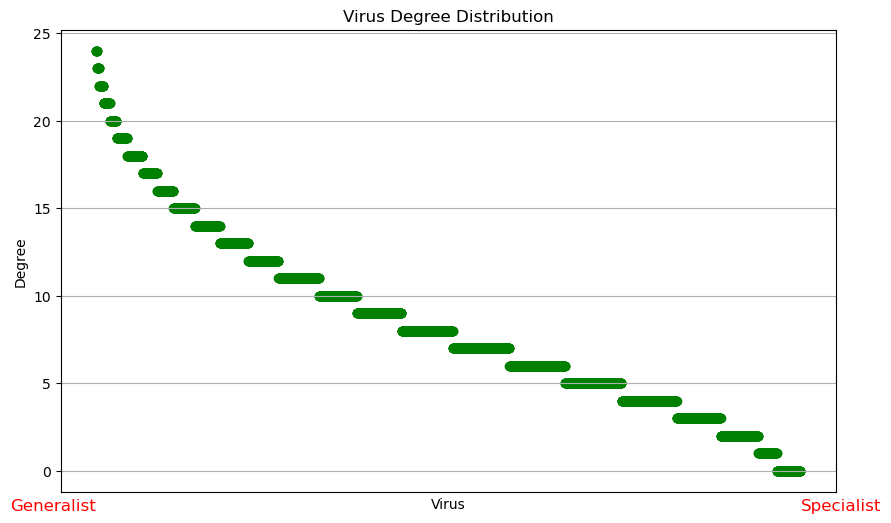

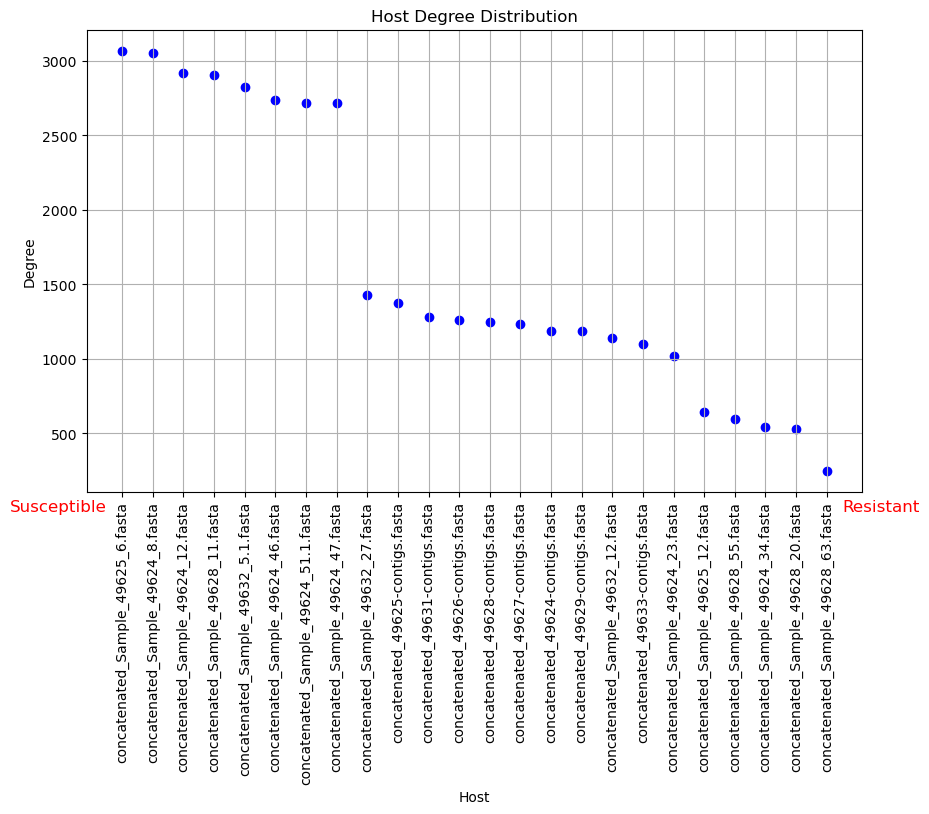

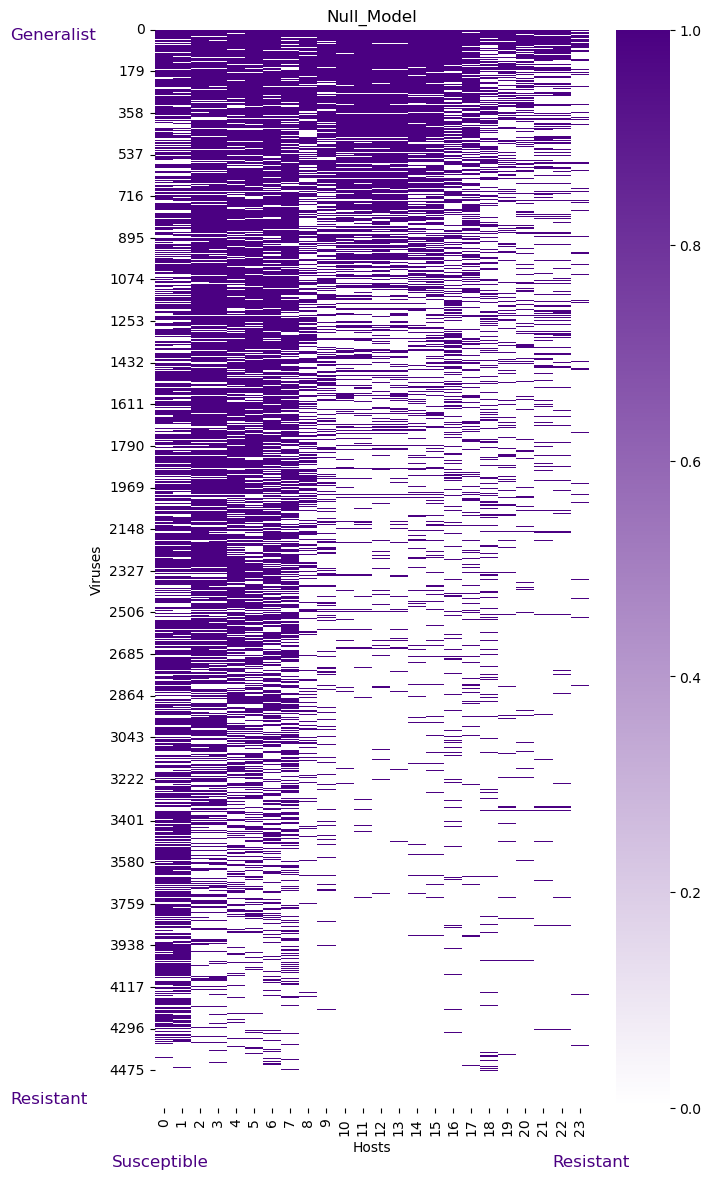

In [48]:
sep29 = PredictionMatrix('Sample_Input/Sep29_predictions.tsv')
sep29.make_rectangular_matrix()
sep29_properties = BipartiteGraph(sep29)
sep29_properties.plot_degree_by_species()
sep29_properties.plot_heatmap()

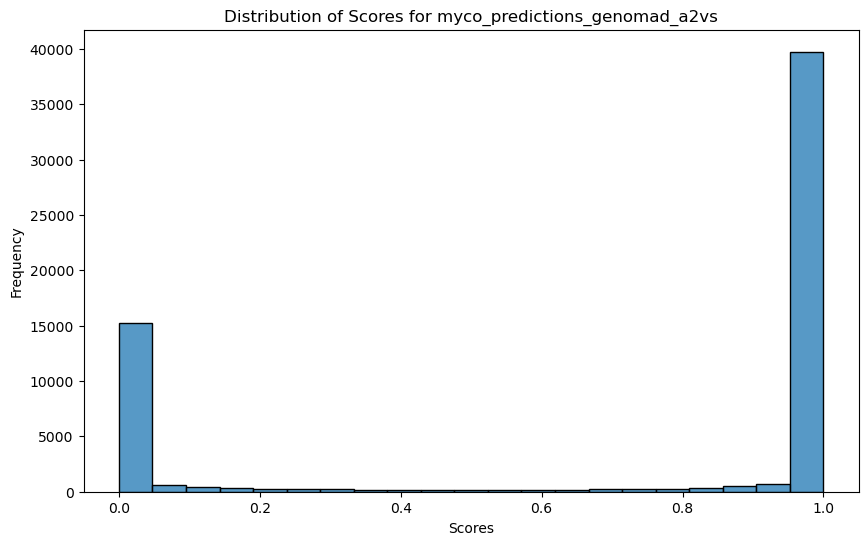

In [12]:
myco.plot_scores()

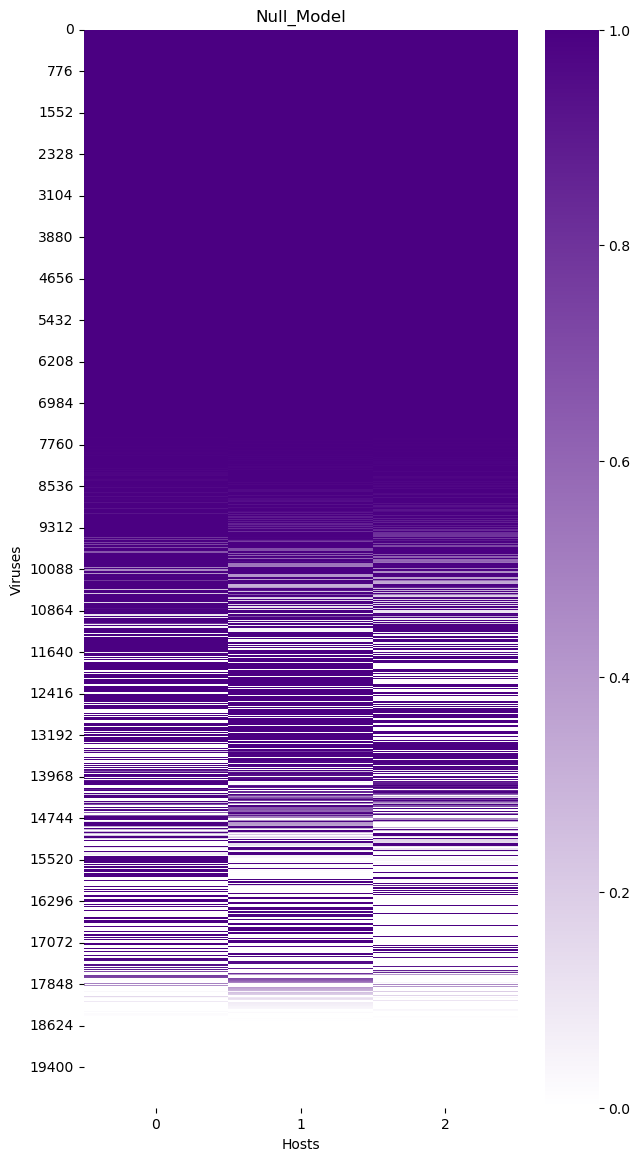

In [13]:
myco_prob = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv', True)
myco_prob.make_rectangular_matrix()
myco_prob_properties = BipartiteGraph(myco_prob)
myco_prob_properties.plot_heatmap()

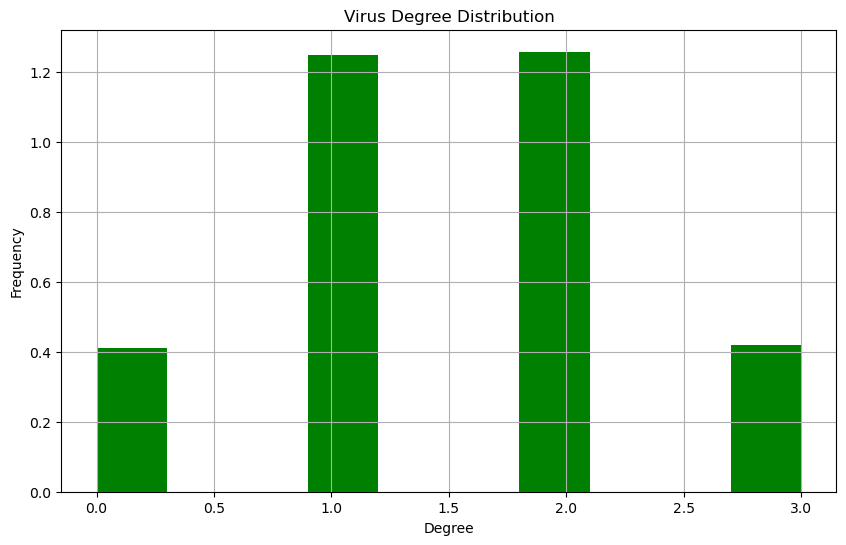

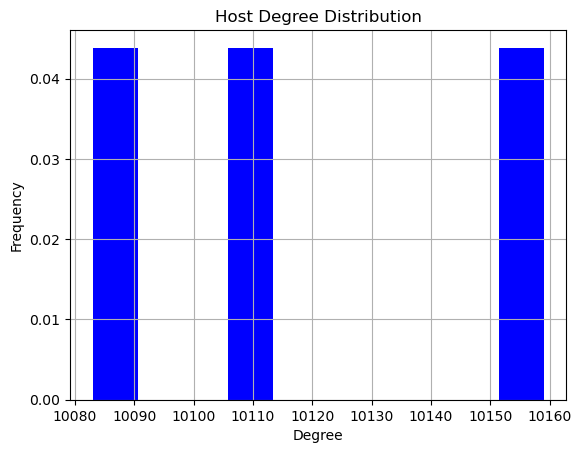

In [13]:
myco_er = ER(myco, 0.5)
myco_er.fill_ER_graph()
myco_er_graph = BipartiteGraph(myco_er)
myco_er_graph.plot_degree_distribution()

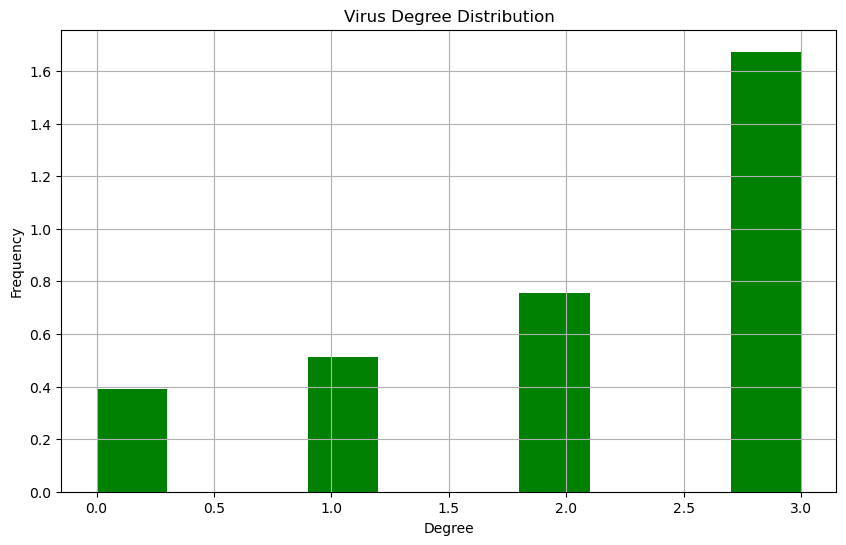

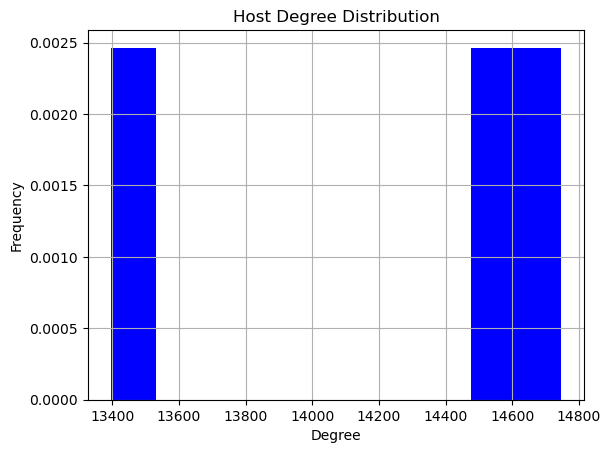

In [14]:
myco_cm = ConfigurationModel(myco)
myco_cm.bootstrap_stats(1000)
myco_cm_graph = BipartiteGraph(myco_cm)
myco_cm_graph.plot_degree_distribution()

### 100 by 2000 subset code is below

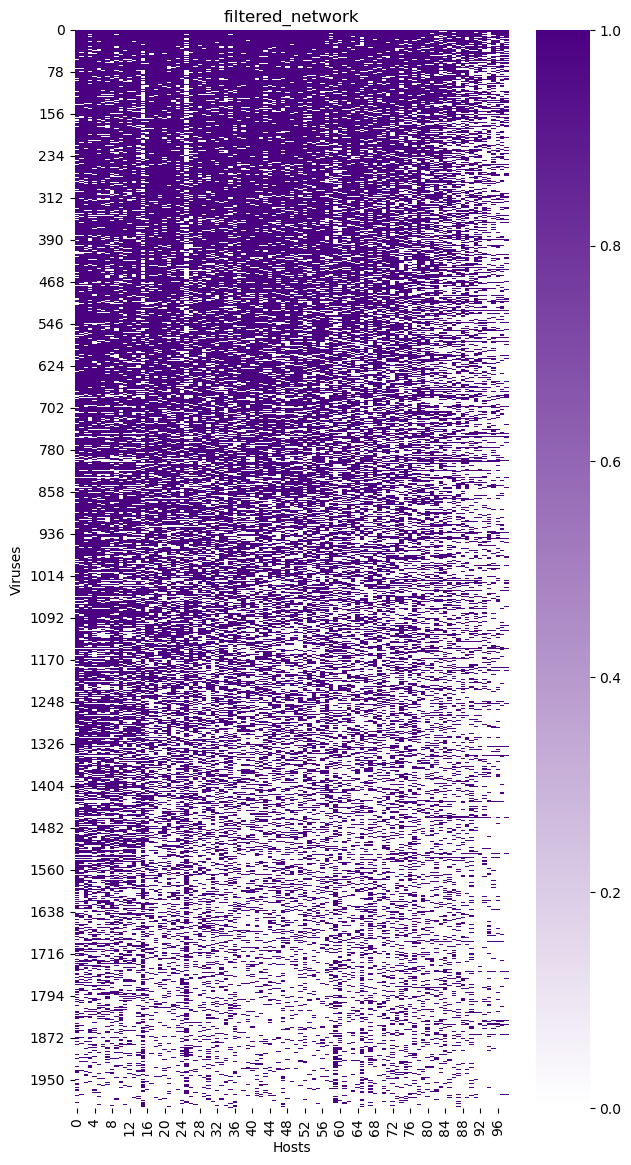

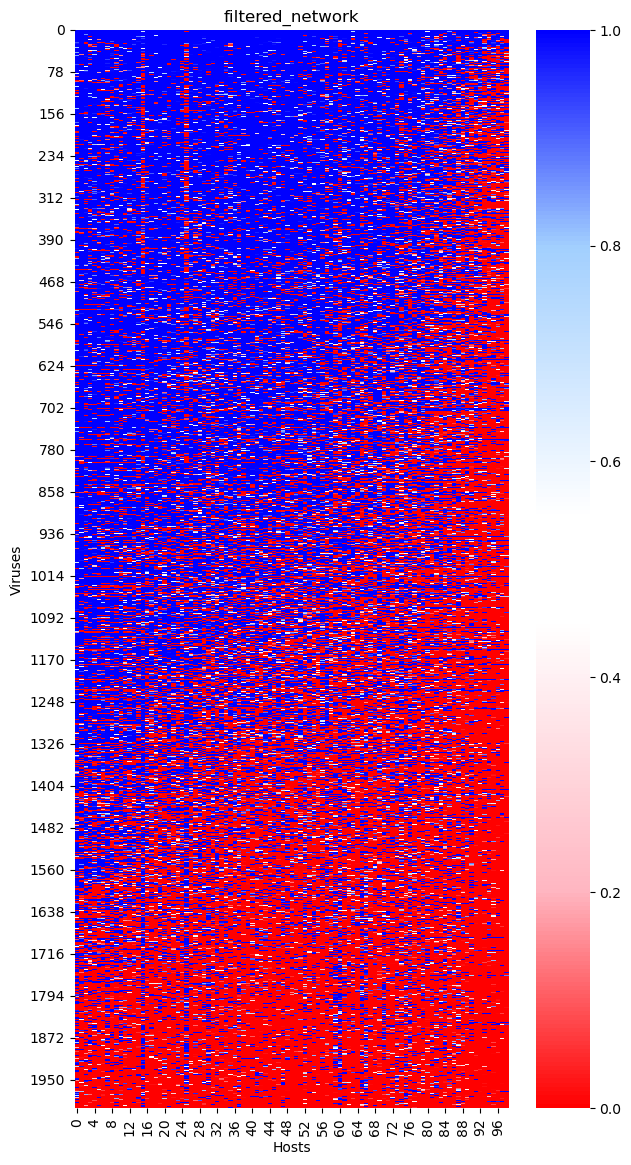

In [9]:
### Large subset 100 x 2000
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix()
filtered_prob = PredictionMatrix('Sample_Input/filtered_network.tsv', True)
filtered_prob.make_rectangular_matrix()
filtered_properties = BipartiteGraph(filtered)
filtered_properties.plot_heatmap()
filtered_prob_properties = BipartiteGraph(filtered_prob)
filtered_prob_properties.plot_heatmap()

In [18]:
filtered_properties.unipartite_graph()

[[ 0 98 97 ...  6  5  1]
 [98  0 96 ...  6  5  1]
 [97 96  0 ...  6  5  1]
 ...
 [ 6  6  6 ...  0  0  0]
 [ 5  5  5 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]]
[[   0 1226 1170 ...  261  258  188]
 [1226    0 1141 ...  281  274  212]
 [1170 1141    0 ...  240  259  194]
 ...
 [ 261  281  240 ...    0  145  126]
 [ 258  274  259 ...  145    0  140]
 [ 188  212  194 ...  126  140    0]]


(2002, 99)


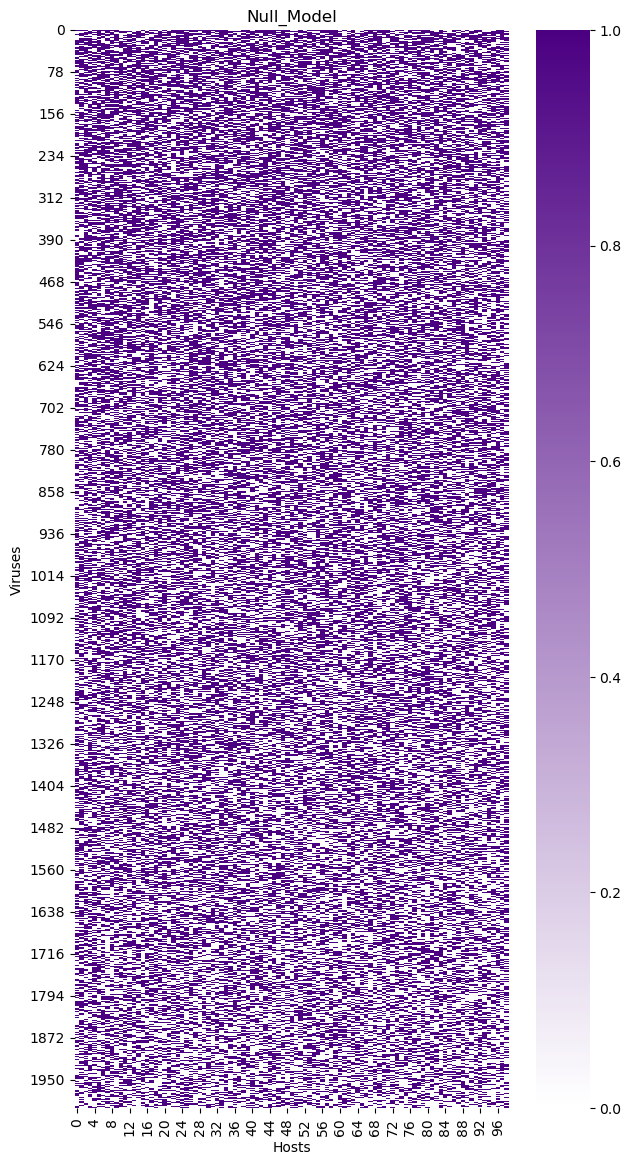

In [13]:
filtered_random = RandomShuffle(filtered)
filtered_random.shuffle_ones()
filtered_random_property = BipartiteGraph(filtered_random)
filtered_random_property.plot_heatmap()

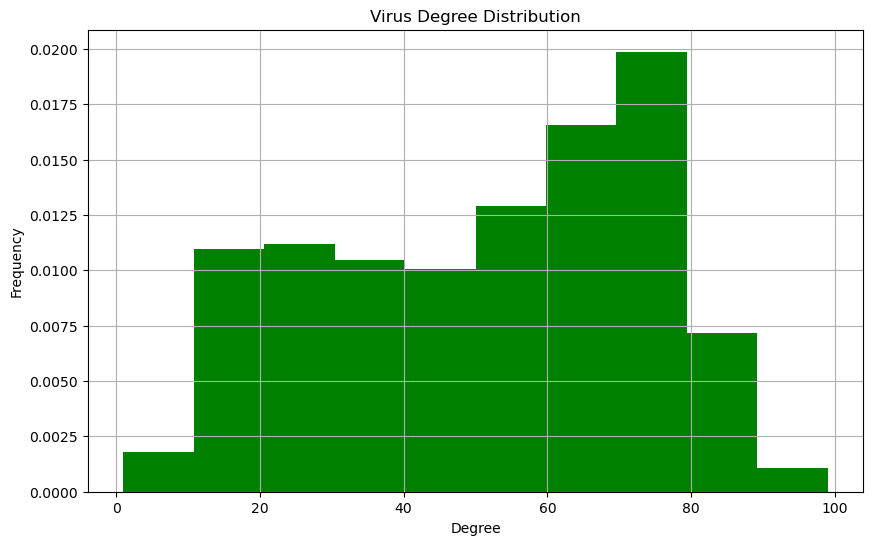

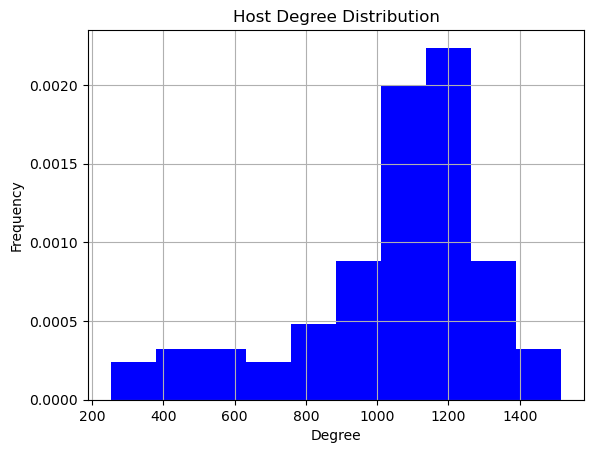

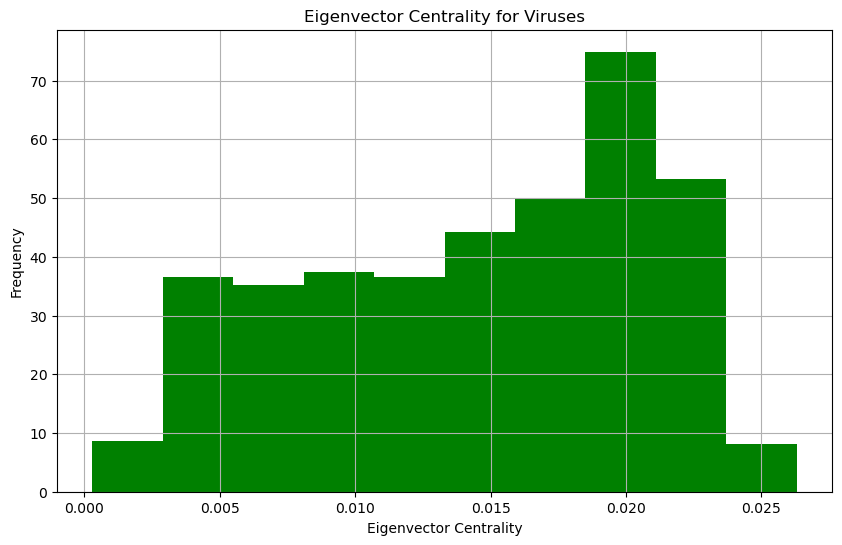

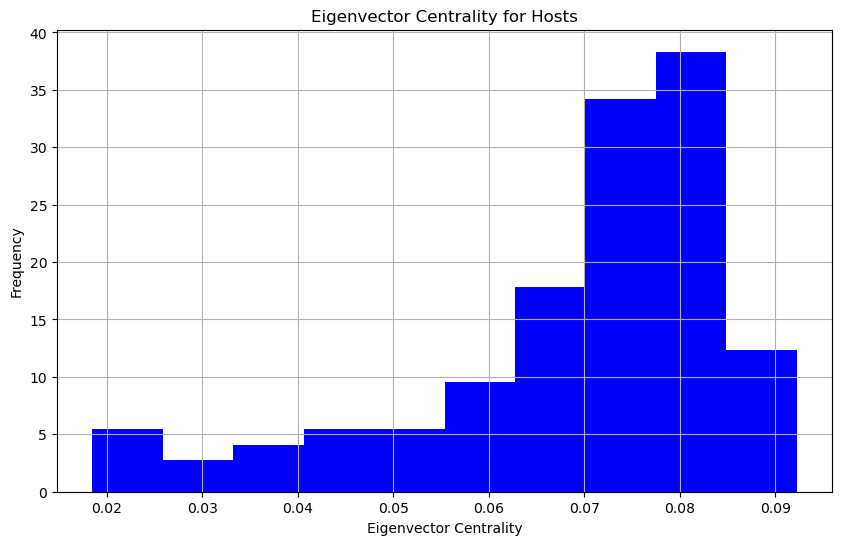

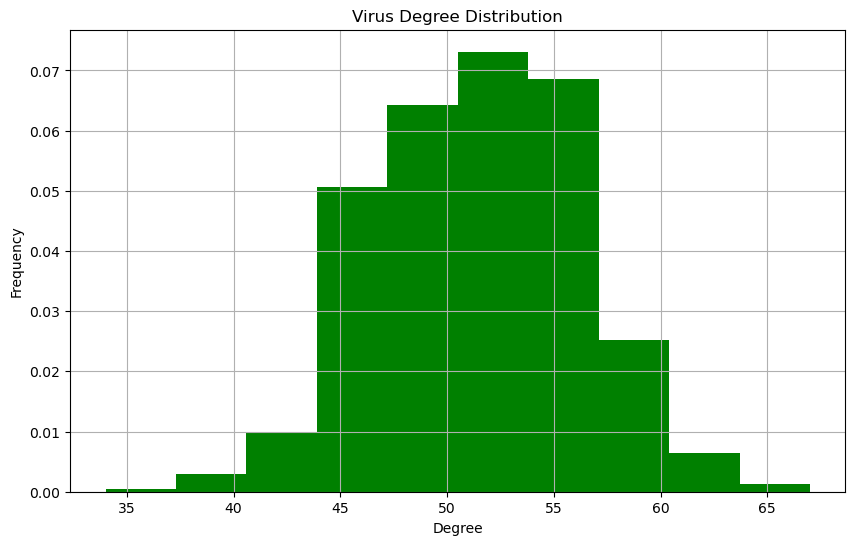

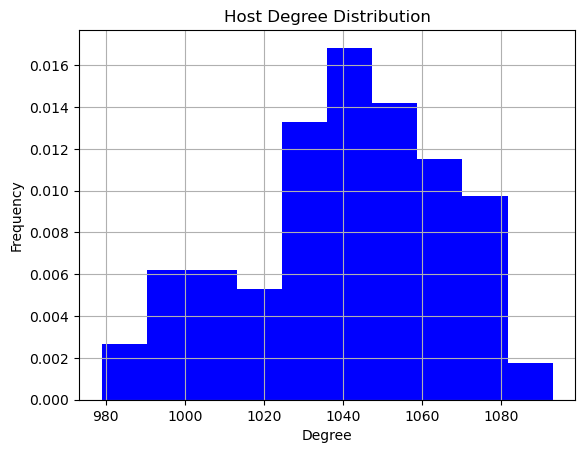

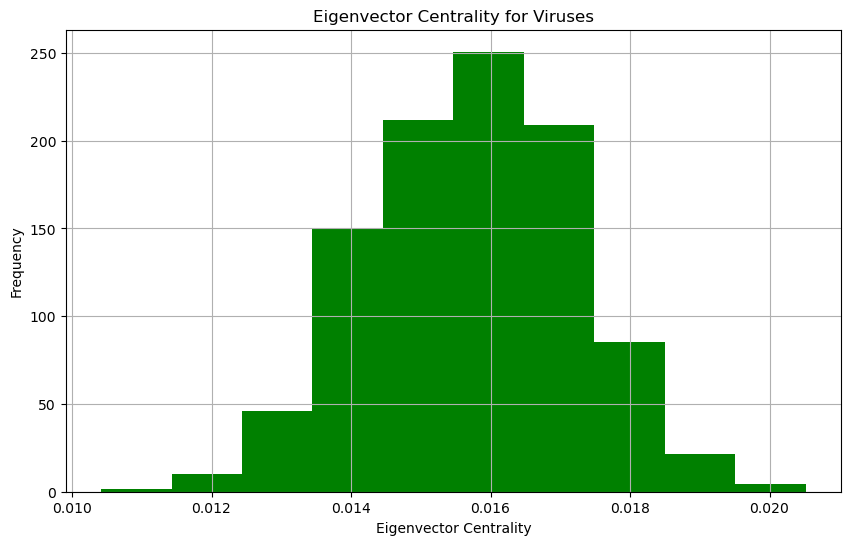

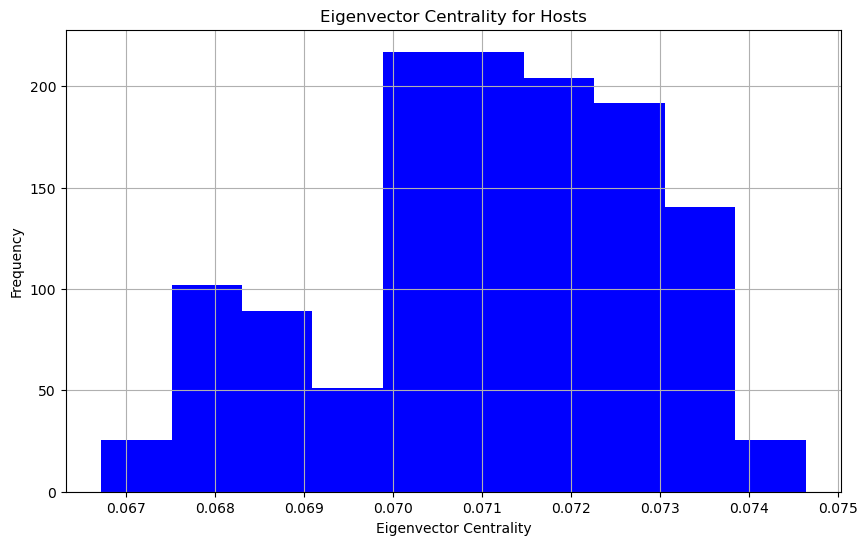

In [16]:
filtered_properties.initialize_graph()
filtered_properties.calculate_centrality(max_iter=2000)
filtered_properties.plot_degree_distribution()
filtered_properties.plot_eigenvector_centrality()

filtered_random_property.initialize_graph()
filtered_random_property.calculate_centrality(max_iter=2000)
filtered_random_property.plot_degree_distribution()
filtered_random_property.plot_eigenvector_centrality()

In [16]:
filtered_cm = ConfigurationModel(filtered)
filtered_cm.bootstrap_stats(100000)
# filtered_cm_graph = Graph(filtered_cm, filtered.unique_viruses, filtered.unique_hosts)
# filtered_cm_graph.degree_distribution(deg_seq)
# filtered_cm_graph.plot_heatmap()

In [ ]:
calc = BipartiteGraph(filtered_cm)
calc.run_parallel(8)

In [ ]:
filtered_properties = BipartiteGraph(filtered)
filtered_properties.initialize_graph()
filtered_properties.calculate_centrality('eigenvector', 2000)
filtered_properties.plot_eigenvector_centrality()
filtered_properties.calculate_centrality('closeness', 2000)
filtered_properties.plot_closeness_centrality()
filtered_properties.calculate_centrality('betweenness', 2000)
filtered_properties.plot_betweenness_centrality()

In [ ]:
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix()

In [ ]:
nodf = filtered_properties.run_parallel(8)

In [ ]:
print(nodf)

In [ ]:
filtered_cm_1 = ConfigurationModel(filtered)
filtered_graph = BipartiteGraph(filtered_cm_1)
filtered_graph.plot_degree_distribution()

In [ ]:
aug4 = PredictionMatrix('Sample_Input/aug4_predictions.tsv')
aug4.make_rectangular_matrix()
cal_aug4 = BipartiteGraph(aug4)
nodf_aug4 = cal_aug4.run_parallel(8)
print(nodf_aug4)

In [ ]:
config_nested = BipartiteGraph(filtered_cm)
nodf = config_nested.run_parallel(8)
print(nodf)

### Myco Data with more hosts

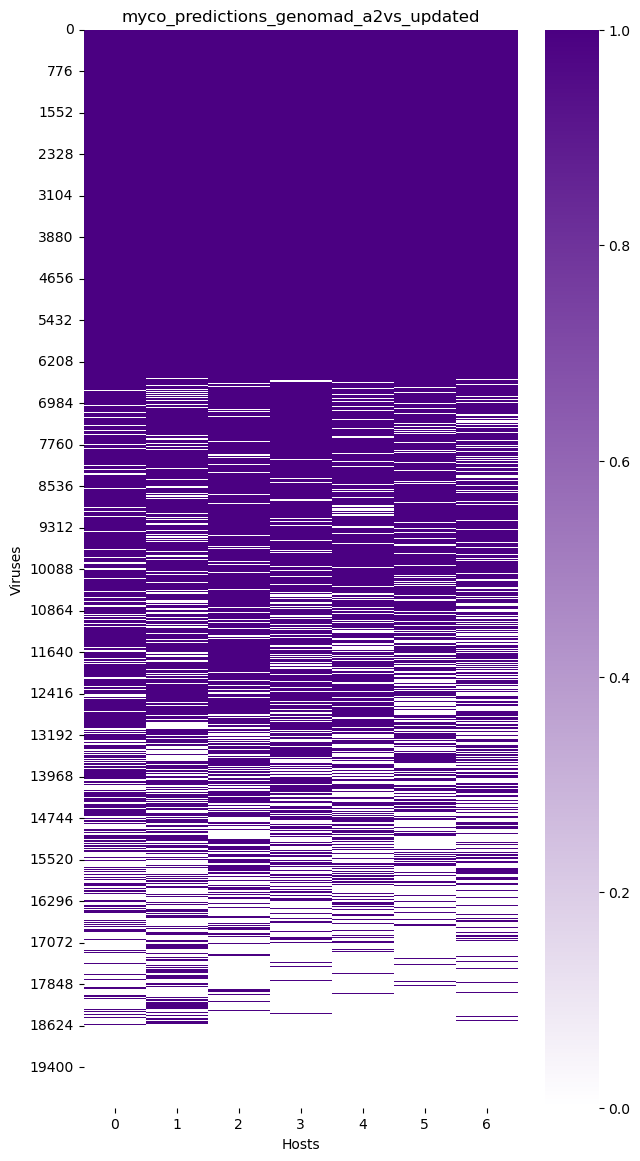

In [3]:
myco_large = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs_updated.tsv')
myco_large.make_rectangular_matrix()
myco_large_properties = BipartiteGraph(myco_large)
myco_large_properties.plot_heatmap()

In [5]:
myco_large_prob = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs_updated.tsv', True)
myco_large_prob.make_rectangular_matrix()
myco_large_prob_properties = BipartiteGraph(myco_large_prob)
myco_large_prob_properties.plot_heatmap()

KeyboardInterrupt: 

In [7]:
myco_large.virus_host_array.shape

(20159, 7)

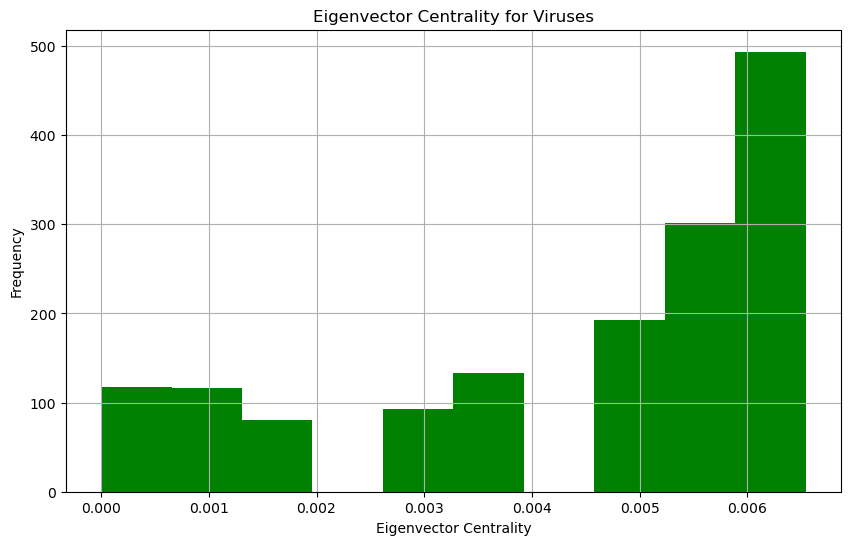

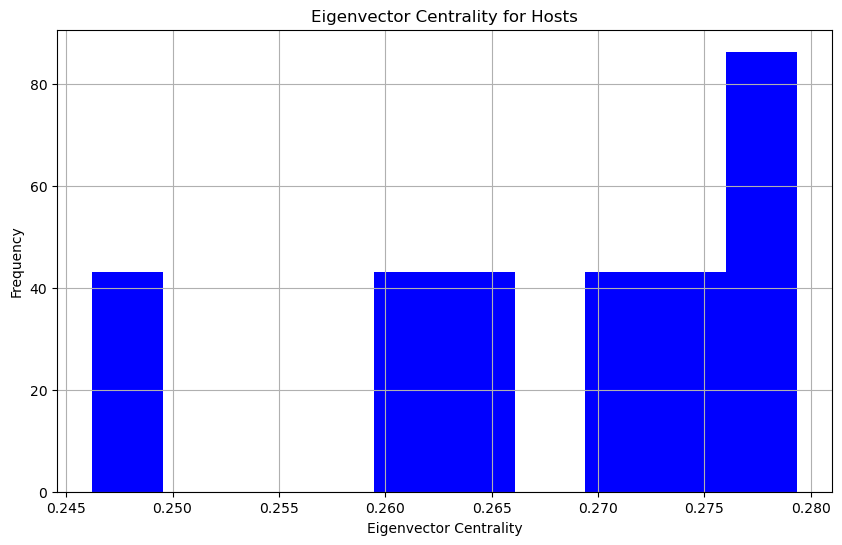

In [22]:
myco_large_properties.initialize_graph()
myco_large_properties.calculate_centrality('eigenvector', 2000)
myco_large_properties.plot_eigenvector_centrality()

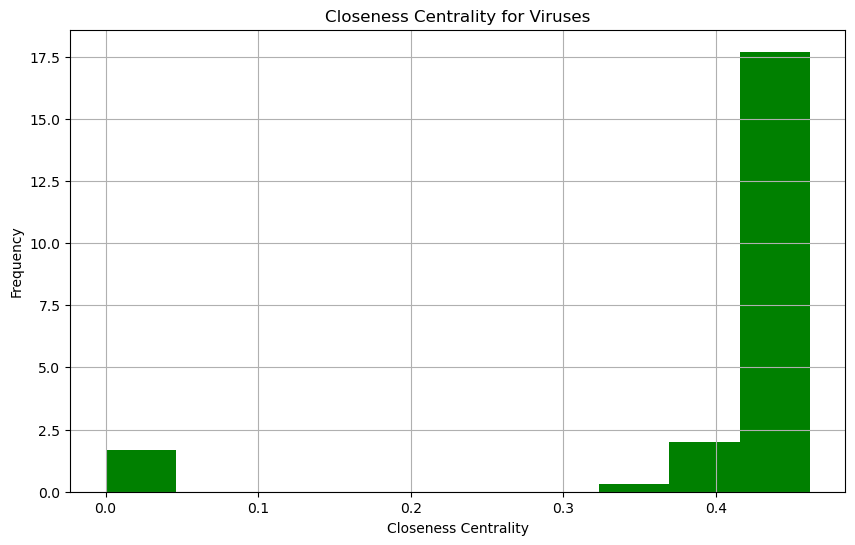

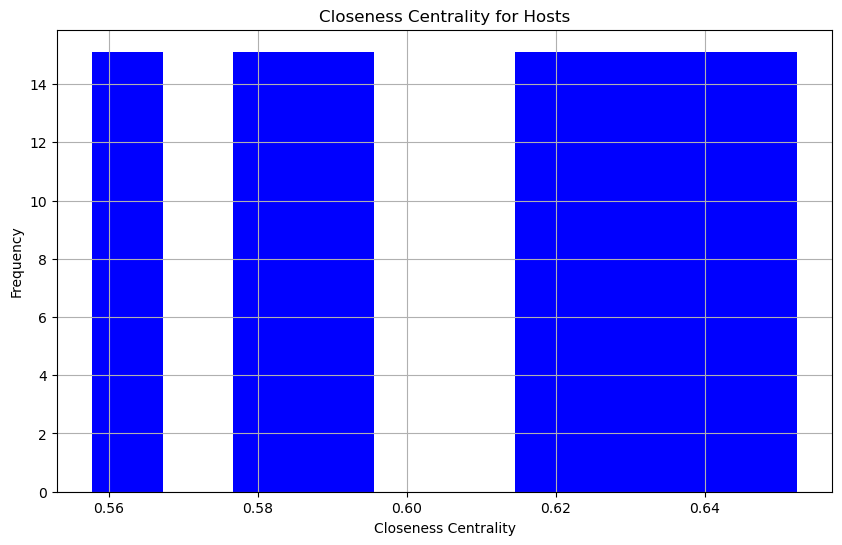

In [23]:
myco_large_properties.calculate_centrality('closeness', 2000)
myco_large_properties.plot_closeness_centrality()

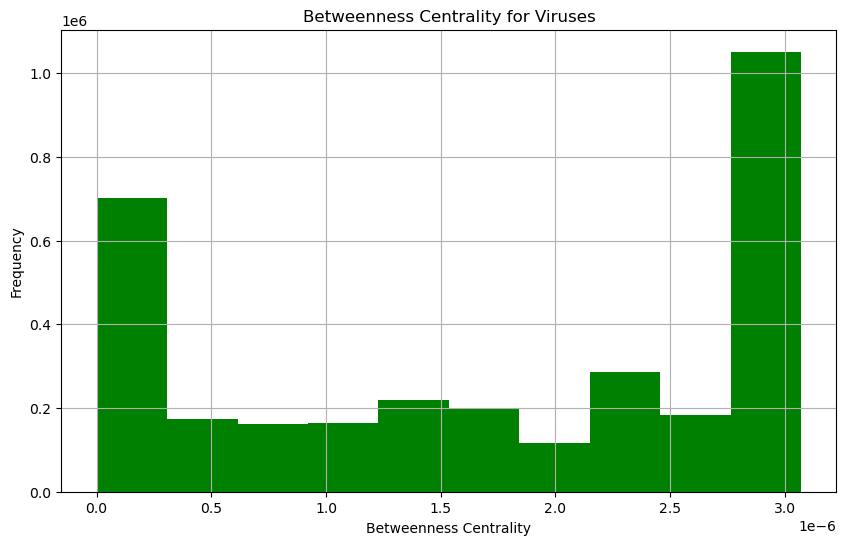

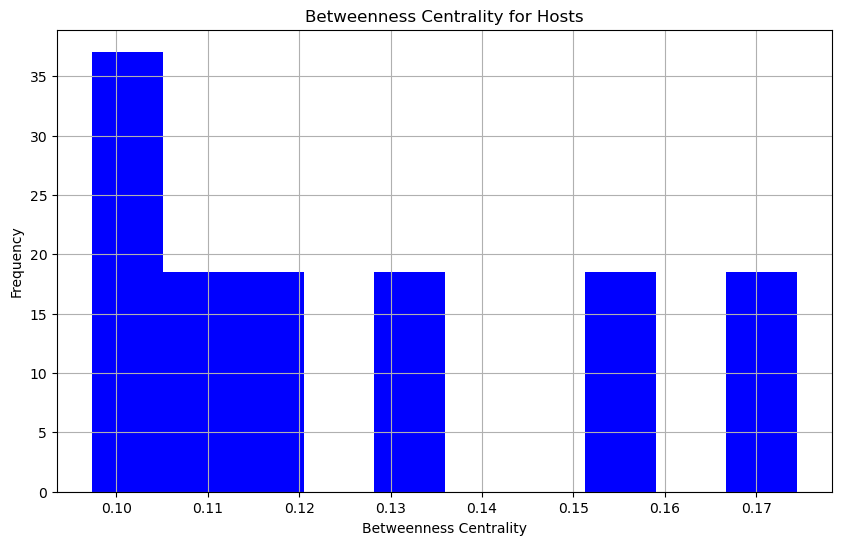

In [24]:
myco_large_properties.calculate_centrality('betweenness', 2000)
myco_large_properties.plot_betweenness_centrality()

In [4]:
myco_large_properties.unipartite_matrix()

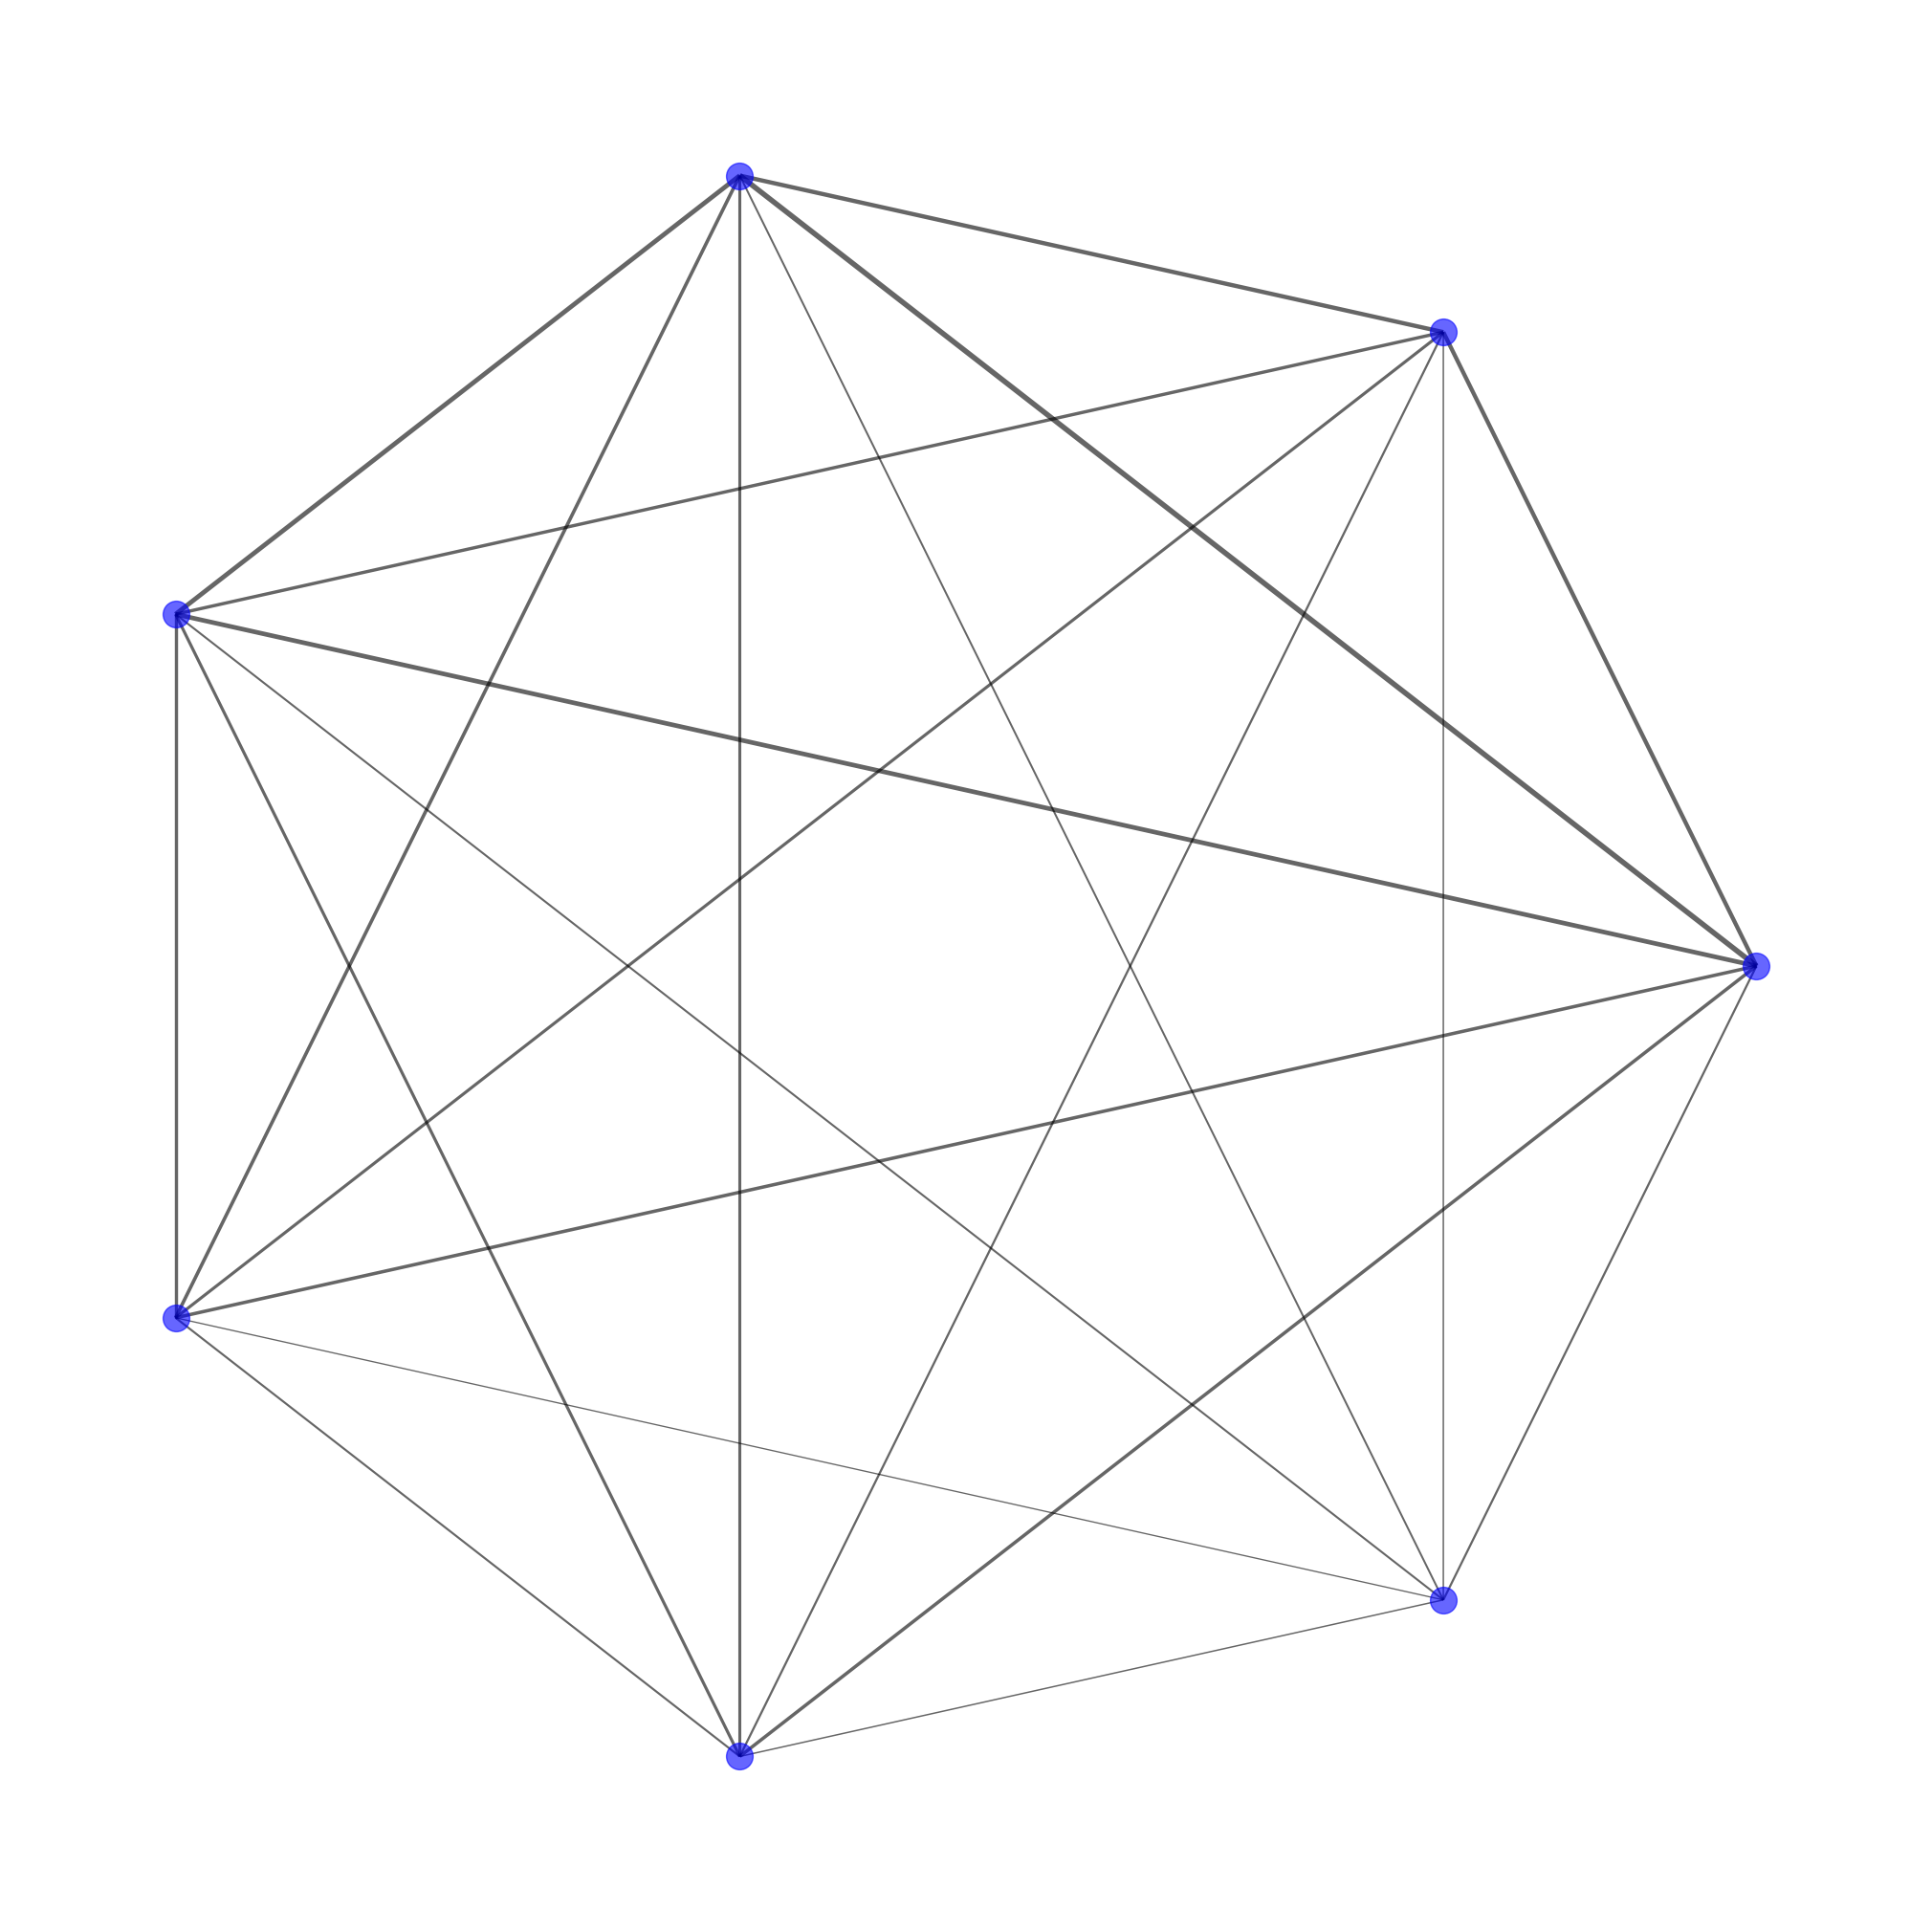

In [26]:
myco_large_properties.unipartite_graph()

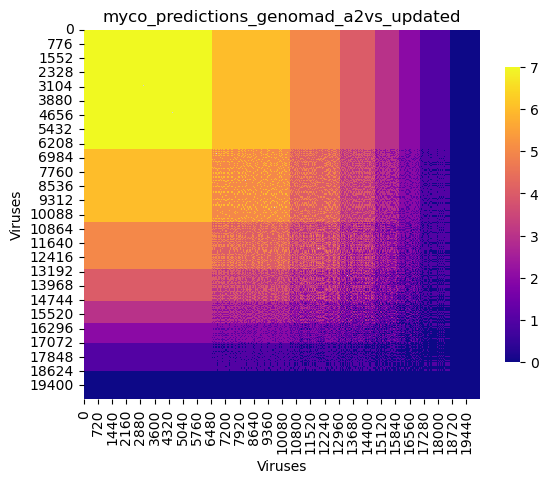

In [45]:
myco_large_properties.plot_virus_virus_heatmap()

0 12357


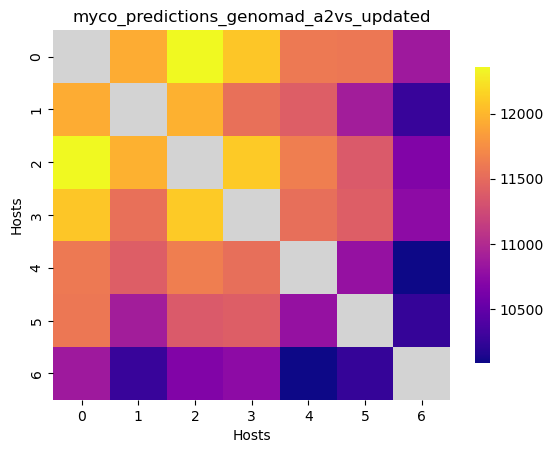

In [44]:
myco_large_properties.plot_host_host_heatmap()

In [36]:
import pandas as pd

print(myco_large_properties.unipartite_hosts)
print(myco_large_properties.unipartite_viruses)
# show in csv
pd.DataFrame(myco_large_properties.unipartite_hosts).to_csv('Sample_Input/myco_large_unipartite_hosts.csv', index=False)
pd.DataFrame(myco_large_properties.unipartite_viruses).to_csv('Sample_Input/myco_large_unipartite_viruses.csv', index=False)

[[    0 11936 12357 12086 11598 11586 10864]
 [11936     0 11966 11537 11406 10889 10265]
 [12357 11966     0 12108 11631 11364 10681]
 [12086 11537 12108     0 11529 11406 10746]
 [11598 11406 11631 11529     0 10801 10087]
 [11586 10889 11364 11406 10801     0 10254]
 [10864 10265 10681 10746 10087 10254     0]]
[[0 7 7 ... 0 0 0]
 [7 0 7 ... 0 0 0]
 [7 7 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
